In [1]:
# Load modules

import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Set plotting parameters

%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='bright')
plt.style.use('../clint.mpl')

In [2]:
#Load predicted labels
with open('svm_labels.npy', 'rb') as dc_handle:
    svm_labels = np.load(dc_handle)

#Load data dict
with open('data_dict_test.pickle', 'rb') as handle:
    data_dict = pickle.load(handle)

#Normalize dwts
dwts = data_dict['dwts']
dwts_norm = np.zeros(dwts.shape)
for i in range(dwts.shape[0]):
    maximum, minimum = np.amax(dwts[i,:]), np.amin(dwts[i,:])
    if abs(maximum) >= abs(minimum) and maximum != 0:
        dwts_norm[i,:] = dwts[i,:]/maximum
    elif abs(maximum) < abs(minimum) and minimum != 0:
        dwts_norm[i,:] = dwts[i,:]/(-1*minimum)
    elif maximum == 0 or minimum == 0:
        dwts_norm[i,:] = dwts[i,:]
print(dwts_norm.shape)

(26059, 256)


In [3]:
# Load all data into a dataframe, exluding waveforms

del data_dict['dwts']
df_data = pd.DataFrame.from_dict(data_dict, orient='columns')
df_data

,wf_mins,wf_maxs,tp_0s,rt_10_50s,rt_10_90s,dt_effs,energies,channels,detectors,cc4s,hv_slots,strings
0,14966.0,15349.0,6896.0,0.0,0.0,498.639526,0,2,V08682B,A1,2,8
1,14977.0,15341.0,53824.0,0.0,0.0,-1231.914673,0,2,V08682B,A1,2,8
2,14947.0,15374.0,3968.0,0.0,0.0,472.853394,0,2,V08682B,A1,2,8
3,14903.0,15298.0,127248.0,0.0,0.0,NaN,0,2,V08682B,A1,2,8
4,15029.0,15336.0,95856.0,0.0,0.0,382.786285,0,2,V08682B,A1,2,8
...,...,...,...,...,...,...,...,...,...,...,...,...
26054,14754.0,14949.0,117072.0,0.0,0.0,-162.112991,0,43,V07647B,F2,2,7
26055,14893.0,15062.0,121792.0,0.0,0.0,-669.265442,0,43,V07647B,F2,2,7
26056,14730.0,14873.0,92448.0,0.0,0.0,1368.581787,0,43,V07647B,F2,2,7
26057,14714.0,14882.0,88080.0,0.0,0.0,-2857.759766,0,43,V07647B,F2,2,7


In [5]:
# Histogram category statistics normalized by total counts 

n_bins = int(np.amax(svm_labels) + 1)
n_events = len(svm_labels)
hist, bins = np.histogram(svm_labels, bins=n_bins)
hist_norm = hist/n_events
errs = np.sqrt(hist)
errs_norm = errs/n_events

categories = ['Norm', 'NegGo', 'UpSlo', 'DownSlo', 
              'Spike', 'XTalk', 'SlowRise', 'EarlyTr', 
              'LateTr', 'Saturation', 'SoftPile', 'HardPile', 'NoiseTr']

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
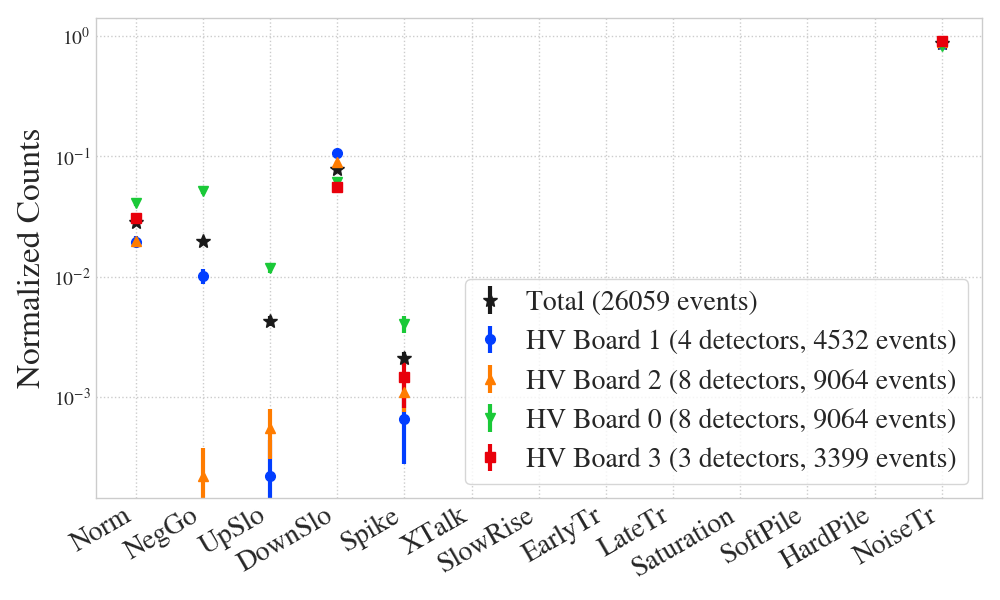

In [6]:
#Plot hv filter board statistics 

%matplotlib widget

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.errorbar(categories, hist_norm, yerr=errs_norm, 
            color='k', linestyle='', marker='*', label=f'Total ({len(svm_labels)} events)')

hv_filter_boards = list(set(df_data['hv_slots']))
markers = ['o','^','v','s','d']

for i, hv_filter in enumerate(hv_filter_boards):
    cut = (df_data['hv_slots'] == hv_filter)
    n_events_cut = len(svm_labels[cut])
    n_dets = len(set(df_data['detectors'][cut]))
    hist_cut, bins_cut = np.histogram(svm_labels[cut], bins=n_bins)
    hist_cut_norm = hist_cut/n_events_cut
    errs_cut = np.sqrt(hist_cut)
    errs_cut_norm = errs_cut/n_events_cut
    ax.errorbar(categories, hist_cut_norm, yerr=errs_cut_norm, linestyle='',
                marker=markers[i], markersize=7, label=f'HV Board {hv_filter} ({n_dets} detectors, {n_events_cut} events)')
    plt.legend(fontsize=18)

plt.xticks(categories, rotation=30, ha='right', fontsize=20)
plt.ylabel('Normalized Counts', fontsize=24)
plt.yscale('log')
plt.legend(fontsize=20, loc='lower right')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
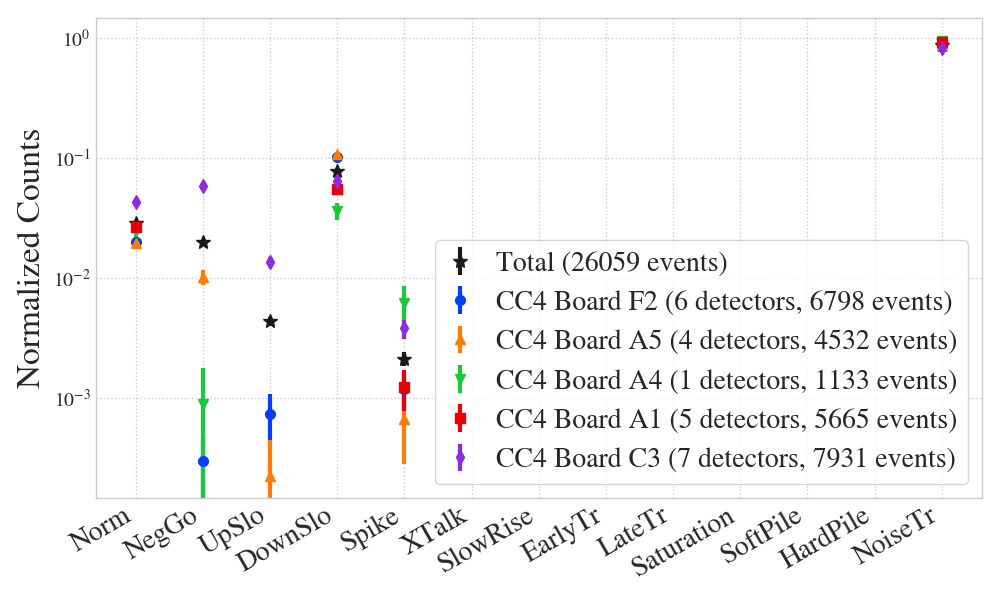

In [7]:
#Plot cc4 board statistics 

%matplotlib widget

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.errorbar(categories, hist_norm, yerr=errs_norm, 
            color='k', linestyle='', marker='*', label=f'Total ({len(svm_labels)} events)')

cc4s = list(set(df_data['cc4s']))

for i, cc4 in enumerate(cc4s):
    cut = (df_data['cc4s'] == cc4)
    n_events_cut = len(svm_labels[cut])
    n_dets = len(set(df_data['detectors'][cut]))
    hist_cut, bins_cut = np.histogram(svm_labels[cut], bins=n_bins)
    hist_cut_norm = hist_cut/n_events_cut
    errs_cut = np.sqrt(hist_cut)
    errs_cut_norm = errs_cut/n_events_cut
    ax.errorbar(categories, hist_cut_norm, yerr=errs_cut_norm, linestyle='',
                marker=markers[i], markersize=7, label=f'CC4 Board {cc4} ({n_dets} detectors, {n_events_cut} events)')
    plt.legend(fontsize=18)

plt.xticks(categories, rotation=30, ha='right', fontsize=20)
plt.ylabel('Normalized Counts', fontsize=24)
plt.yscale('log')
plt.legend(fontsize=20, loc='lower right')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
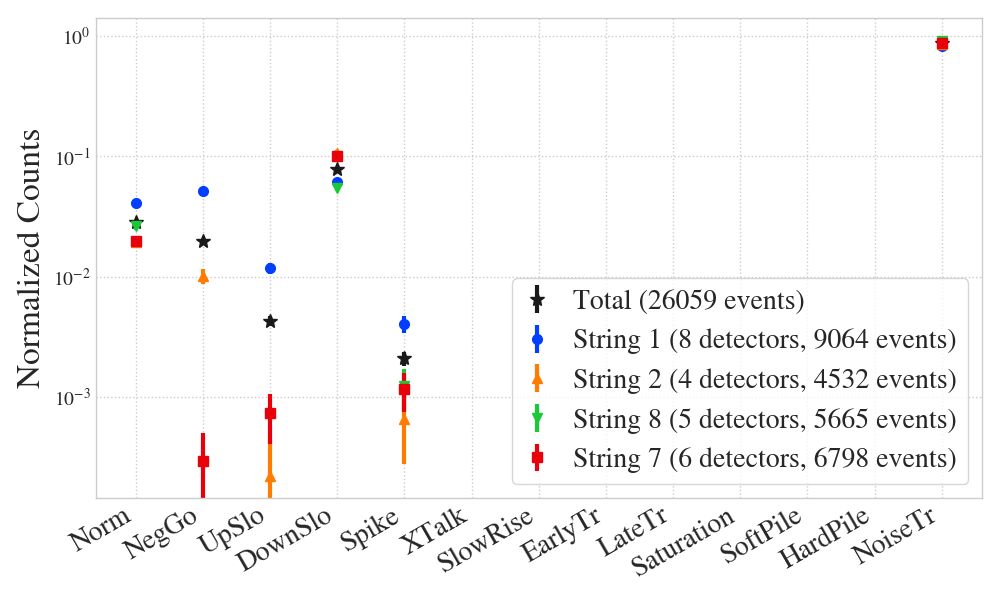

In [8]:
#Plot string statistics 

%matplotlib widget

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.errorbar(categories, hist_norm, yerr=errs_norm, 
            color='k', linestyle='', marker='*', label=f'Total ({len(svm_labels)} events)')

strings = list(set(df_data['strings']))

for i, string in enumerate(strings):
    cut = (df_data['strings'] == string)
    n_events_cut = len(svm_labels[cut])
    n_dets = len(set(df_data['detectors'][cut]))
    hist_cut, bins_cut = np.histogram(svm_labels[cut], bins=n_bins)
    hist_cut_norm = hist_cut/n_events_cut
    errs_cut = np.sqrt(hist_cut)
    errs_cut_norm = errs_cut/n_events_cut
    ax.errorbar(categories, hist_cut_norm, yerr=errs_cut_norm, linestyle='',
                marker=markers[i], markersize=7, label=f'String {string} ({n_dets} detectors, {n_events_cut} events)')
    plt.legend(fontsize=18)

plt.xticks(categories, rotation=30, ha='right', fontsize=20)
plt.ylabel('Normalized Counts', fontsize=24)
plt.yscale('log')
plt.legend(fontsize=20, loc='lower right')